In [ ]:
!pip install prophet
!pip install yfinance

In [15]:
import prophet
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = yf.download(['BTC-USD'])['2020':]

[*********************100%***********************]  1 of 1 completed


In [ ]:
data['y'] = data['Close']
data['ds'] = data.index

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume,y,ds
Date,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,7200.174316,2020-01-01
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,6985.470215,2020-01-02
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,7344.884277,2020-01-03
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,7410.656738,2020-01-04
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,7411.317383,2020-01-05
...,...,...,...,...,...,...,...,...
2022-06-30,20108.312500,20141.160156,18729.656250,19784.726562,19784.726562,26267239923,19784.726562,2022-06-30
2022-07-01,19820.470703,20632.671875,19073.708984,19269.367188,19269.367188,30767551159,19269.367188,2022-07-01
2022-07-02,19274.835938,19371.748047,19027.082031,19242.255859,19242.255859,18100418740,19242.255859,2022-07-02


In [10]:
model = prophet.Prophet(daily_seasonality = True, weekly_seasonality = True)   # normalization, scaling bulit-in
model.fit(data[['ds', 'y']])

09:23:38 - cmdstanpy - INFO - Chain [1] start processing
09:23:38 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
prediction = model.predict(model.make_future_dataframe(periods = 60))

In [12]:
prediction.index = prediction['ds']

In [13]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2020-01-01,7429.648421,6726.527127,14049.066444,7429.648421,7429.648421,2795.168651,2795.168651,2795.168651,1316.036949,...,92.343176,92.343176,92.343176,1386.788527,1386.788527,1386.788527,0.0,0.0,0.0,10224.817072
2020-01-02,2020-01-02,7400.658264,6674.868096,13702.185276,7400.658264,7400.658264,2785.494989,2785.494989,2785.494989,1316.036949,...,-57.707950,-57.707950,-57.707950,1527.165989,1527.165989,1527.165989,0.0,0.0,0.0,10186.153253
2020-01-03,2020-01-03,7371.668107,6522.300778,14032.171268,7371.668107,7371.668107,2895.289203,2895.289203,2895.289203,1316.036949,...,-46.091588,-46.091588,-46.091588,1625.343843,1625.343843,1625.343843,0.0,0.0,0.0,10266.957310
2020-01-04,2020-01-04,7342.677950,6509.490776,14055.572985,7342.677950,7342.677950,2980.213705,2980.213705,2980.213705,1316.036949,...,-13.669973,-13.669973,-13.669973,1677.846729,1677.846729,1677.846729,0.0,0.0,0.0,10322.891655
2020-01-05,2020-01-05,7313.687793,6696.735077,14046.371249,7313.687793,7313.687793,2995.604421,2995.604421,2995.604421,1316.036949,...,-2.700252,-2.700252,-2.700252,1682.267724,1682.267724,1682.267724,0.0,0.0,0.0,10309.292214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29,2022-08-29,21789.419549,19286.164815,29533.915733,18563.942290,25052.812474,2457.348918,2457.348918,2457.348918,1316.036949,...,12.890761,12.890761,12.890761,1128.421208,1128.421208,1128.421208,0.0,0.0,0.0,24246.768467
2022-08-30,2022-08-30,21691.204358,19101.220218,29285.305099,18334.349686,25066.736659,2390.468877,2390.468877,2390.468877,1316.036949,...,14.935826,14.935826,14.935826,1059.496102,1059.496102,1059.496102,0.0,0.0,0.0,24081.673235
2022-08-31,2022-08-31,21592.989167,19014.478464,29325.787664,18117.779033,25113.452777,2378.313737,2378.313737,2378.313737,1316.036949,...,92.343176,92.343176,92.343176,969.933613,969.933613,969.933613,0.0,0.0,0.0,23971.302905


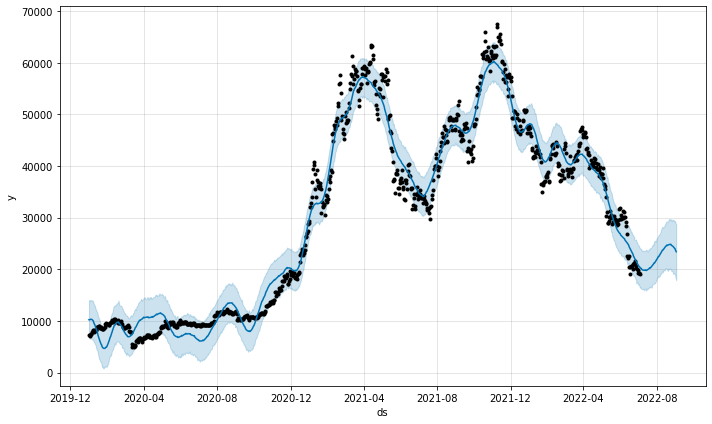

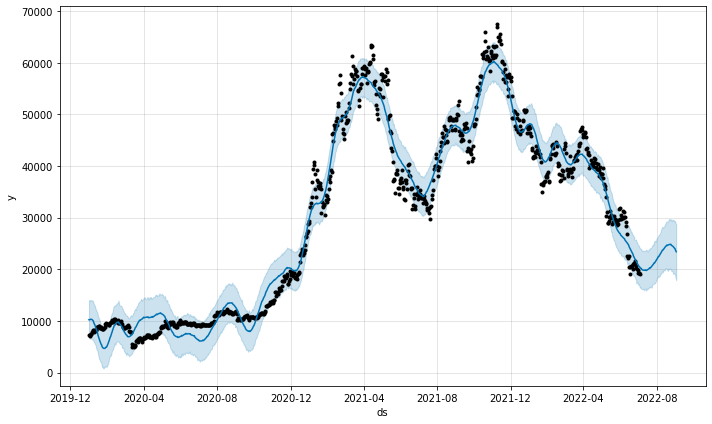

In [16]:
model.plot(prediction[['ds', 'yhat', 'yhat_upper', 'yhat_lower']])

- `yhat` : prediction
- `yhat_upper`, `yhat_lower` : confidence interval